<a href="https://colab.research.google.com/github/usjay/tree_classifier_model/blob/main/tree_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.layers import Dropout, BatchNormalization

In [40]:
# Step 1: Upload the dataset
uploaded = files.upload()


Saving dataset.csv to dataset (2).csv


In [41]:
# Step 2: Load the dataset
data = pd.read_csv("dataset.csv")

# Print the column names
print(data.columns)


Index(['Ratio', 'Angle1 ', 'Angle 2', 'Name'], dtype='object')


In [42]:
# Step 3: Preprocess data
# Update these column names based on the actual column names in your dataset
X = data[['Ratio', 'Angle1 ', 'Angle 2']]  # Selecting feature columns with correct names
y = data['Name']  # Selecting the label column

In [43]:
# Encode categorical target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [47]:
# Step 5: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# Step 7: Train model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,  # Start with a higher number of epochs
                    batch_size=64,
                    validation_split=0.2,

                   )

Epoch 1/100
5/5 [==============================] - 2s 64ms/step - loss: 1.1370 - accuracy: 0.5000 - val_loss: 0.9740 - val_accuracy: 0.6389
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.8492 - accuracy: 0.6736 - val_loss: 0.9388 - val_accuracy: 0.7639
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.7540 - accuracy: 0.7222 - val_loss: 0.9041 - val_accuracy: 0.8333
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7472 - accuracy: 0.7118 - val_loss: 0.8667 - val_accuracy: 0.8472
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.5802 - accuracy: 0.7882 - val_loss: 0.8265 - val_accuracy: 0.8750
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.5037 - accuracy: 0.8264 - val_loss: 0.7873 - val_accuracy: 0.8889
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4551 - accuracy: 0.8611 - val_loss: 0.7507 - val_accuracy: 0.8889
Epoch 8/100
5/5 [===

In [49]:
# Step 7: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9667
Test Accuracy: 0.9667


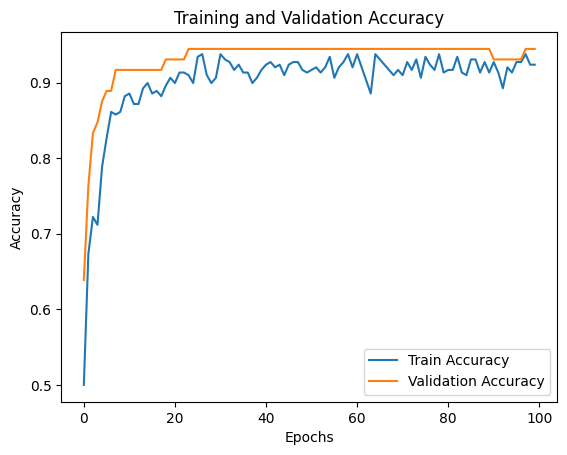

In [50]:
# Step 8: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [51]:
# Step 6: Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [55]:
# Step 7: Train model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,  # Start with a higher number of epochs
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/100
5/5 [==============================] - 0s 52ms/step - loss: 0.1849 - accuracy: 0.9271 - val_loss: 0.1946 - val_accuracy: 0.9444
Epoch 2/100
5/5 [==============================] - 0s 39ms/step - loss: 0.1765 - accuracy: 0.9271 - val_loss: 0.1975 - val_accuracy: 0.9444
Epoch 3/100
5/5 [==============================] - 0s 37ms/step - loss: 0.1898 - accuracy: 0.9271 - val_loss: 0.1996 - val_accuracy: 0.9444
Epoch 4/100
5/5 [==============================] - 0s 22ms/step - loss: 0.1869 - accuracy: 0.9340 - val_loss: 0.1986 - val_accuracy: 0.9444
Epoch 5/100
5/5 [==============================] - 0s 34ms/step - loss: 0.1827 - accuracy: 0.9097 - val_loss: 0.1979 - val_accuracy: 0.9444
Epoch 6/100
5/5 [==============================] - 0s 31ms/step - loss: 0.1846 - accuracy: 0.9340 - val_loss: 0.1950 - val_accuracy: 0.9444


In [56]:
# Print the number of epochs used
print(f'Training stopped after {len(history.epoch)} epochs')

Training stopped after 6 epochs


In [57]:
# Step 8: Evaluate Re traine model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9667
Test Accuracy: 0.9667


In [58]:
from sklearn.model_selection import GridSearchCV
# Assuming `model` is your trained model

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Decode the class labels if you used LabelEncoder
predicted_classes = label_encoder.inverse_transform(predicted_classes)

# Print some example predictions
for i in range(90):  # Print the first 10 predictions
    print(f"Predicted class: {predicted_classes[i]}, Actual class: {label_encoder.inverse_transform([y_test[i]])[0]}")


3/3 [==============================] - 0s 5ms/step
Predicted class: Maadan, Actual class: Maadan
Predicted class: Maadan, Actual class: Maadan
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Maadan, Actual class: Maadan
Predicted class: Christina, Actual class: Christina
Predicted class: Maadan, Actual class: Maadan
Predicted class: Maadan, Actual class: Maadan
Predicted class: Christina, Actual class: Christina
Predicted class: Christina, Actual class: Christina
Predicted class: Mee , Actual class: Mee 
Predicted class: Maadan, Actual class: Maadan
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Maadan, Actual class: Maadan
Predicted class: Mee , Actual class: Mee 
Predicted class: Christina, Actual class: Christina
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 